							Threshold


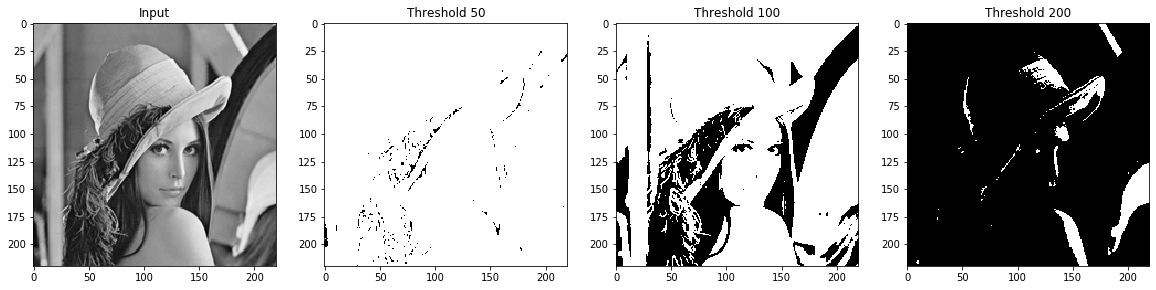

							  Otsu


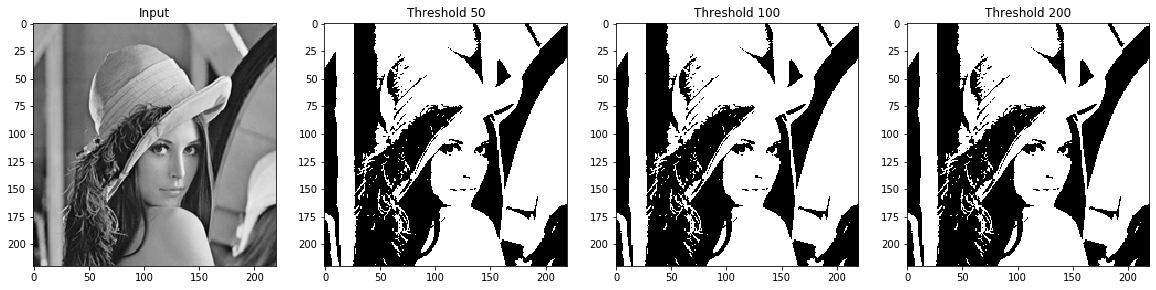

							  Gaussian Otsu


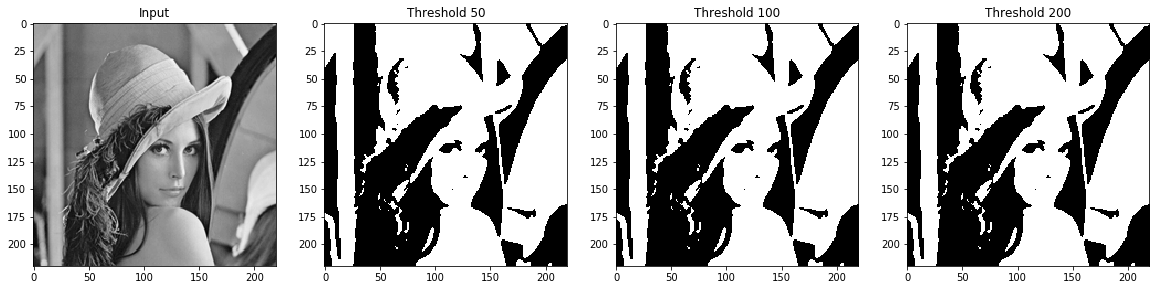

In [21]:
"""
Binarization (Gray)

@author: Rodrigo Schardong

"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

from Basic_Class import Basic_PDI_Functions
pdi = Basic_PDI_Functions()

name = "Lena_c.png" #The image file name
image = cv2.imread(name, 0) #Var image has your input image



binarized_threshold_50 = pdi.ThresholdBinarize(image,50)
binarized_threshold_100 = pdi.ThresholdBinarize(image,100)
binarized_threshold_200 = pdi.ThresholdBinarize(image,200)

print("\t\t\t\t\t\t\tThreshold")
#PLOT
f,a = plt.subplots(ncols = 4, figsize=(20,5))
a[0].imshow(image, cmap="gray")
a[0].set_title("Input")
a[1].imshow(binarized_threshold_50.astype(int), cmap="gray")
a[1].set_title("Threshold 50")
a[2].imshow(binarized_threshold_100.astype(int), cmap="gray")
a[2].set_title("Threshold 100")
a[3].imshow(binarized_threshold_200.astype(int), cmap="gray")
a[3].set_title("Threshold 200")
plt.show()


otsu_50 = pdi.Otsu(image, 50)
otsu_100 = pdi.Otsu(image, 100)
otsu_200 = pdi.Otsu(image, 200)

print("\t\t\t\t\t\t\t  Otsu")
#PLOT
f,b = plt.subplots(ncols = 4, figsize=(20,5))
b[0].imshow(image, cmap="gray")
b[0].set_title("Input")
b[1].imshow(otsu_50.astype(int), cmap="gray")
b[1].set_title("Threshold 50")
b[2].imshow(otsu_100.astype(int), cmap="gray")
b[2].set_title("Threshold 100")
b[3].imshow(otsu_200.astype(int), cmap="gray")
b[3].set_title("Threshold 200")
plt.show()


gaussian_otsu_50 = pdi.GaussianOtsu(image, 50)
gaussian_otsu_100 = pdi.GaussianOtsu(image, 100)
gaussian_otsu_200 = pdi.GaussianOtsu(image, 200)

print("\t\t\t\t\t\t\t  Gaussian Otsu")
#PLOT
f,c = plt.subplots(ncols = 4, figsize=(20,5))
c[0].imshow(image, cmap="gray")
c[0].set_title("Input")
c[1].imshow(gaussian_otsu_50.astype(int), cmap="gray")
c[1].set_title("Threshold 50")
c[2].imshow(gaussian_otsu_100.astype(int), cmap="gray")
c[2].set_title("Threshold 100")
c[3].imshow(gaussian_otsu_200.astype(int), cmap="gray")
c[3].set_title("Threshold 200")
plt.show()


							Channels


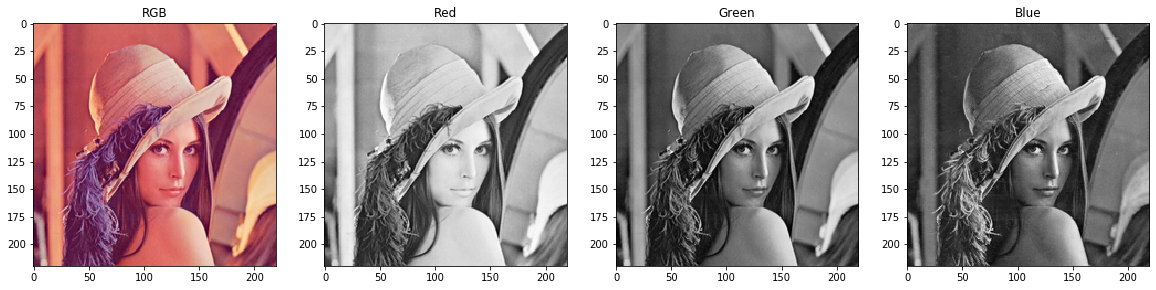

In [6]:
"""
Split Channels (RGB)

@author: Rodrigo Schardong

"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

from Basic_Class import Basic_PDI_Functions
pdi = Basic_PDI_Functions()

name = "Lena_c.png" #The image file name
image = cv2.imread(name) #Var image has your input image

red = pdi.SelectChannel(image, "Red")
green = pdi.SelectChannel(image, "green")
blue = pdi.SelectChannel(image, "b")


print("\t\t\t\t\t\t\tChannels")
#PLOT
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                                                                                                                                                                                                                                                                                                                                                                                       
f,a = plt.subplots(ncols = 4, figsize=(20,5))
a[0].imshow(image, cmap="gray")
a[0].set_title("RGB")
a[1].imshow(red.astype(int), cmap="gray")
a[1].set_title("Red")
a[2].imshow(green.astype(int), cmap="gray")
a[2].set_title("Green")
a[3].imshow(blue.astype(int), cmap="gray")
a[3].set_title("Blue")
plt.show()

							Filters


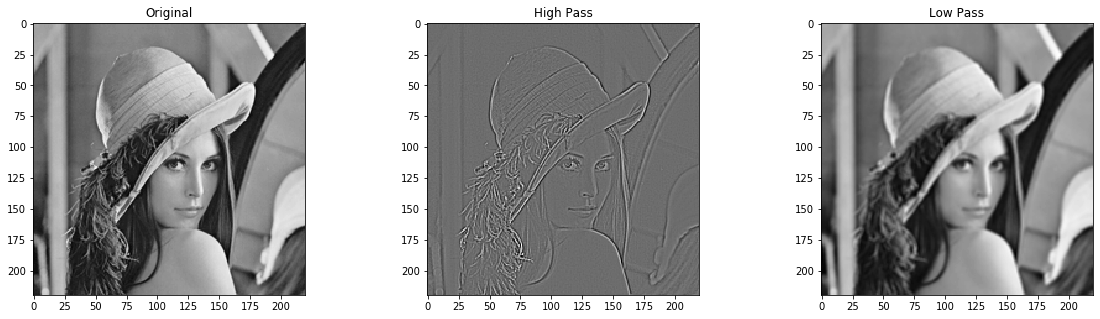

In [17]:
"""
Filters

@author: Rodrigo Schardong

"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

from Basic_Class import Basic_PDI_Functions
pdi = Basic_PDI_Functions()

name = "Lena_c.png" #The image file name
image = cv2.imread(name, 0) #Var image has your input image

#Masks to use in Filters
high_pass_mask = np.array([[-1,-1,-1], [-1, 8, -1], [-1,-1,-1]])
low_pass_mask = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

#Filtering
high_pass = pdi.Filter(image, high_pass_mask)
low_pass = pdi.Filter(image, low_pass_mask)


print("\t\t\t\t\t\t\tFilters")
#PLOT
f,a = plt.subplots(ncols = 3, figsize=(20,5))
a[0].imshow(image, cmap="gray")
a[0].set_title("Original")
a[1].imshow(high_pass.astype(int), cmap="gray")
a[1].set_title("High Pass")
a[2].imshow(low_pass.astype(int), cmap="gray")
a[2].set_title("Low Pass")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


							  Channels


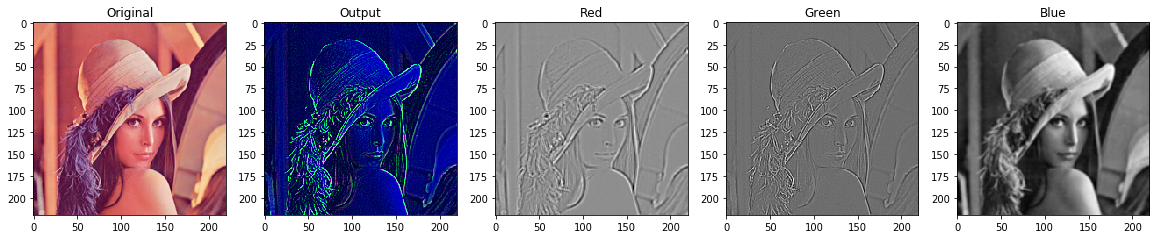

In [19]:
"""
Filters RGB

@author: Rodrigo Schardong

"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

from Basic_Class import Basic_PDI_Functions
pdi = Basic_PDI_Functions()

name = "Lena_c.png" #The image file name
image = cv2.imread(name) #Var image has your input image

output = pdi.CreateAs(image) #Creating an array with same sizes than input

#Masks to use in Filters
high_pass_mask = np.array([[-1,-1,-1], [-1, 8, -1], [-1,-1,-1]])
low_pass_mask = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

#Filtering
output = pdi.FilterRGB(image, low_pass_mask, 1, 0, 1)
output = pdi.FilterRGB(output, high_pass_mask, 1, 1, 0)


#Spliting channels
red = pdi.SelectChannel(output, "R")
green = pdi.SelectChannel(output, "Green")
blue = pdi.SelectChannel(output, "BLUE")

outputRGB = cv2.merge((red, green, blue)) #Merging in RGB to plot(cv2 works in BGR)

print("\t\t\t\t\t\t\t  Channels")
#PLOT
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Merging in RGB to plot(cv2 works in BGR)
f,a = plt.subplots(ncols = 5, figsize=(20,5))
a[0].imshow(image)
a[0].set_title("Original")
a[1].imshow(outputRGB.astype(int), cmap="gray")
a[1].set_title("Output")
a[2].imshow(red.astype(int), cmap="gray")
a[2].set_title("Red")
a[3].imshow(green.astype(int), cmap="gray")
a[3].set_title("Green")
a[4].imshow(blue.astype(int), cmap="gray")
a[4].set_title("Blue")
plt.show()